Hallo. Hier ist der glorreiche Versuche einen Würfel auf eine Kugel zu plotten und vielleicht auch anderse herum. Wir freuen uns.

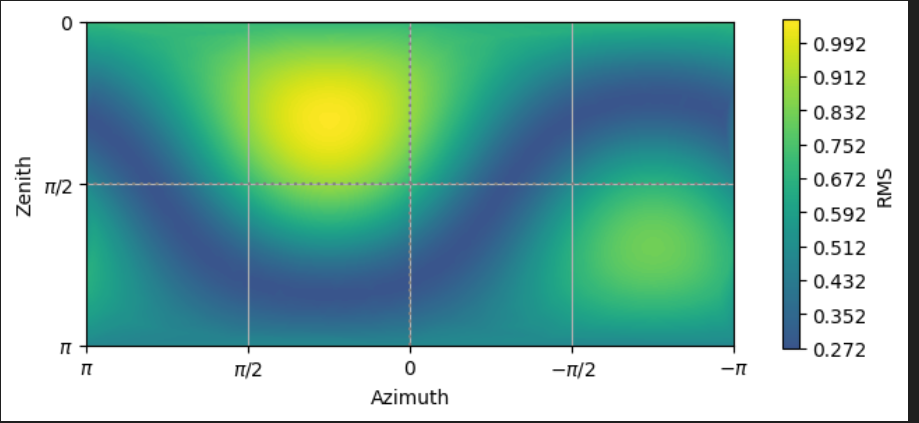

In [476]:
import numpy as np 
import matplotlib.pyplot as plt 
import pyfar as pf
import spaudiopy as spa


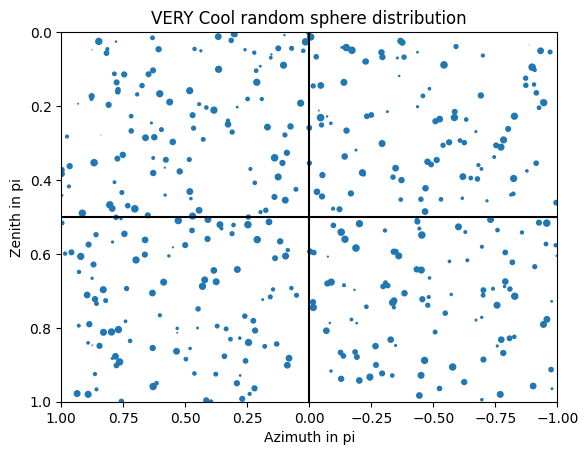

In [477]:
# choose seed --> very important !!!. Only works with theese numbers.
seed = [42, 69, 420][2]
np.random.seed(seed)

# generate random 3 dimensional array
test_array = np.random.random((seed,3))
#print(test_array)

# skale azimuth
test_array[:,0] -= 0.5
test_array[:,0] *= 2

# zenith is already perfect <3

# skale amplitude
test_array[:,2] *= 20




plt.scatter(test_array[:,0], test_array[:,1], s=test_array[:, 2])
plt.xlim(1, -1)
plt.ylim(1, 0)
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.title('VERY Cool random sphere distribution')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

plt.show()

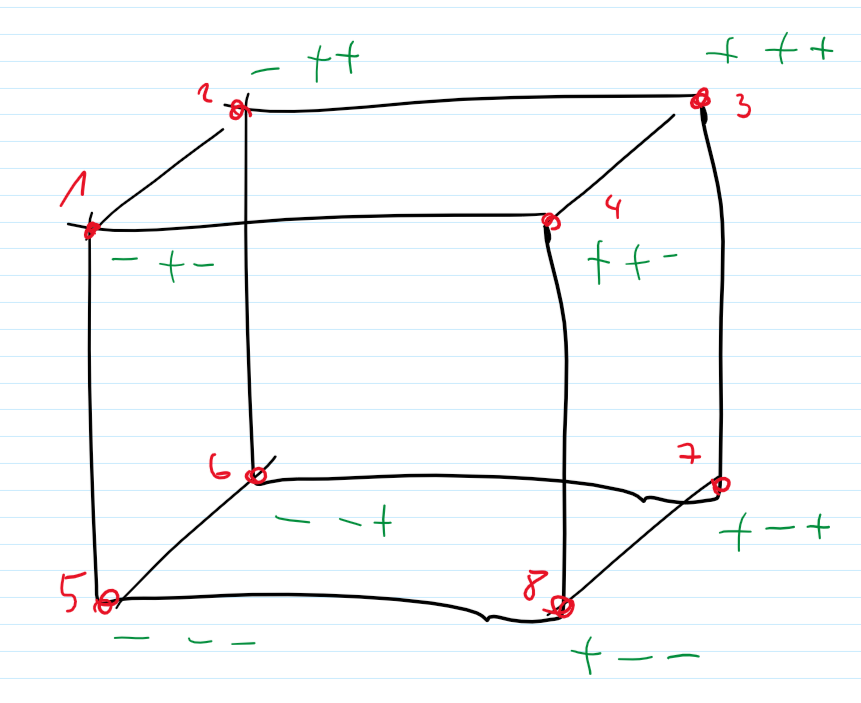

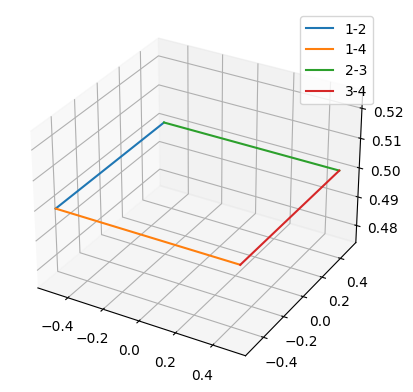

In [478]:
plt.figure()
plt.subplot(projection='3d')

plt.plot((-0.5, -0.5), (-0.5, 0.5), (0.5, 0.5), label='1-2')
plt.plot((-0.5, 0.5), (-0.5, -0.5), (0.5, 0.5), label='1-4')
plt.plot((-0.5, 0.5), (0.5, 0.5), (0.5, 0.5), label='2-3')
plt.plot((0.5, 0.5), (0.5, -0.5), (0.5, 0.5), label='3-4')

#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')
#plt.plot((0.5, 0.5), (0.5, 0.5),(0.5, 0.5), label='top')

plt.legend()
plt.show()

# hardcoding is fine but we need the points as variables

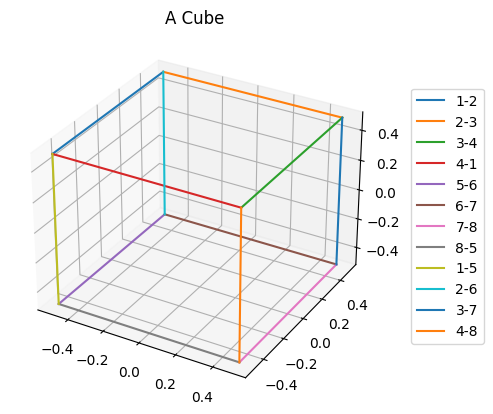

In [479]:
# assume cube with Kantenlänge = 1

points = np.array([
    (-1,1,-1),
    (-1,1,1),
    (1,1,1),
    (1,1,-1),
    (-1,-1,-1),
    (-1,-1,1),
    (1,-1,1),
    (1,-1,-1)
])
#points = np.add(points, 1)
points = np.multiply(points, 0.5)

edge_points = np.array([
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 1),
    (5, 6),
    (6, 7),
    (7, 8),
    (8, 5),
    (1, 5),
    (2, 6),
    (3, 7),
    (4, 8)
])
# subtract 1 to count like a real computer
edge_points = np.add(edge_points, -1)


# loop magic
x_start = []
y_start = []
z_start = []

x_end = []
y_end = []
z_end = []

labels = []

for i in edge_points:
    point_number_start = i[0]
    point_number_end = i[1]

    x_i_start = points[point_number_start][0]
    x_i_end = points[point_number_end][0]

    y_i_start = points[point_number_start][1]
    y_i_end = points[point_number_end][1]

    z_i_start = points[point_number_start][2]
    z_i_end = points[point_number_end][2]

    x_start.append(x_i_start)
    y_start.append(y_i_start)
    z_start.append(z_i_start)

    x_end.append(x_i_end)
    y_end.append(y_i_end)
    z_end.append(z_i_end)

    label_i = str(point_number_start + 1) + "-" + str(point_number_end + 1)
    labels.append(label_i)

plt.figure()
plt.subplot(projection='3d')

for i, label in enumerate(labels):
    plt.plot((x_start[i], x_end[i]), 
             (z_start[i], z_end[i]),
             (y_start[i], y_end[i]),
             label=label)

plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
#plt.tight_layout()
plt.title('A Cube')

plt.show()

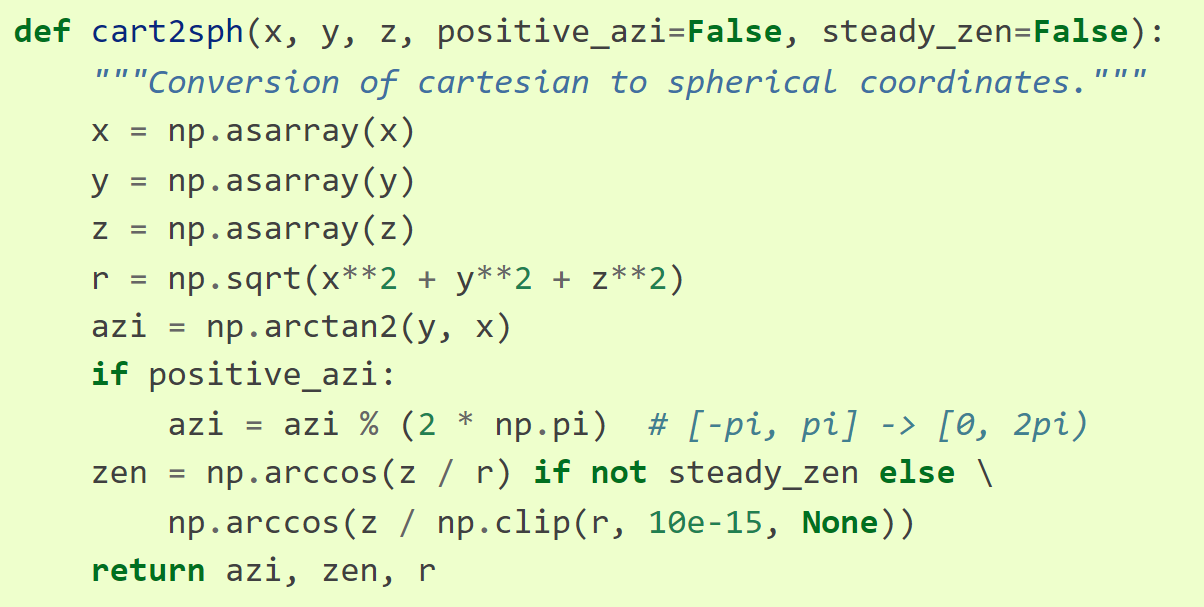

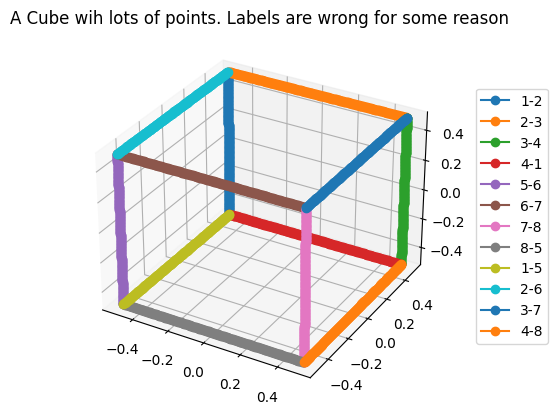

In [480]:
# now we want the cube in sperical representation

x_start_sph = []
y_start_sph = []
z_start_sph = []

x_end_sph = []
y_end_sph = []
z_end_sph = []

start_points_xyz = np.array([
    x_start,
    y_start,
    z_start
]).T

end_points_xyz = np.array([
    x_end,
    y_end,
    z_end
]).T


plt.figure()
plt.subplot(projection='3d')

points_per_line = 200
# make lines xyz array (number, dimension, sample)
lines_xyz = np.empty((12, 3, points_per_line))

for i, label in enumerate(labels):
    line_points = np.linspace(start_points_xyz[i], end_points_xyz[i], points_per_line).T
    lines_xyz[i, :, : ] = line_points
    plt.plot(lines_xyz[i][0], lines_xyz[i][1], lines_xyz[i][2], label=label, marker='o')


plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.title('A Cube wih lots of points. Labels are wrong for some reason')
plt.show()

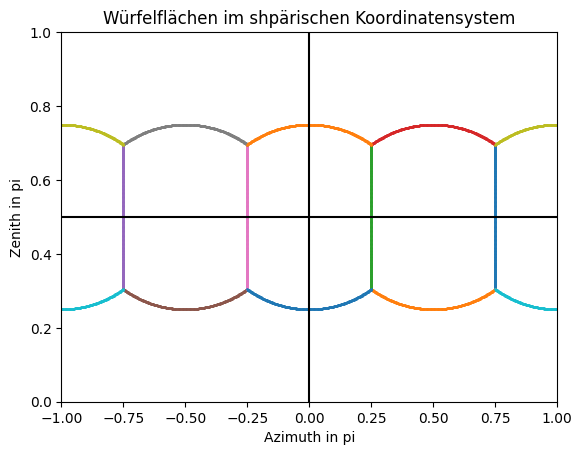

In [493]:

# make lines sph array (number, azi/zen/r, sample)
lines_sph = np.empty((12, 3, points_per_line))

for i, label in enumerate(labels):
    lines_sph[i, :, :] = spa.utils.cart2sph(lines_xyz[i][0], lines_xyz[i][1], lines_xyz[i][2], positive_azi=False)
    plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1)

plt.xlim(-1,1)
plt.ylim(0,1)
plt.title('Würfelflächen im shpärischen Koordinatensystem')
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

plt.show()


In [482]:
# this doesn't work :(
start_points_sph = spa.utils.cart2sph(start_points_xyz[0], start_points_xyz[1], start_points_xyz[2], positive_azi=False)
end_points_sph = spa.utils.cart2sph(end_points_xyz[0], end_points_xyz[1], end_points_xyz[2], positive_azi=False)

print(start_points_sph[0])

[-2.35619449  0.78539816  2.35619449]


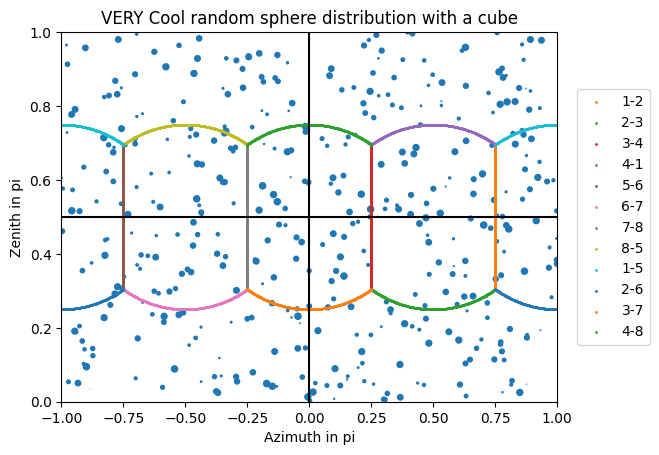

In [487]:
plt.scatter(test_array[:,0], test_array[:,1], s=test_array[:, 2])
plt.xlabel('Azimuth in pi')
plt.ylabel('Zenith in pi')
plt.title('VERY Cool random sphere distribution with a cube')
plt.axhline(0.5, c='black')
plt.axvline(0, c='black')

for i , label in enumerate(labels):
    plt.scatter(lines_sph[i][0]/np.pi, lines_sph[i][1]/np.pi, s=1, label=label)
    

plt.xlim(-1,1)
plt.ylim(0,1)

plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show()